In [2]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
# Load the dataset
file_path = "retail_sales_dataset.csv"
data = pd.read_csv(file_path)

In [4]:
# Display dataset structure and first few rows
print("Dataset Information:\n")
data.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
print("\nFirst 5 rows of the dataset:\n")
print(data.head())


First 5 rows of the dataset:

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [6]:
# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [7]:
# Check for shape of the dataset
print("\n Shape of the dataset :\n")
data.shape


 Shape of the dataset :



(1000, 9)

In [8]:
data["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

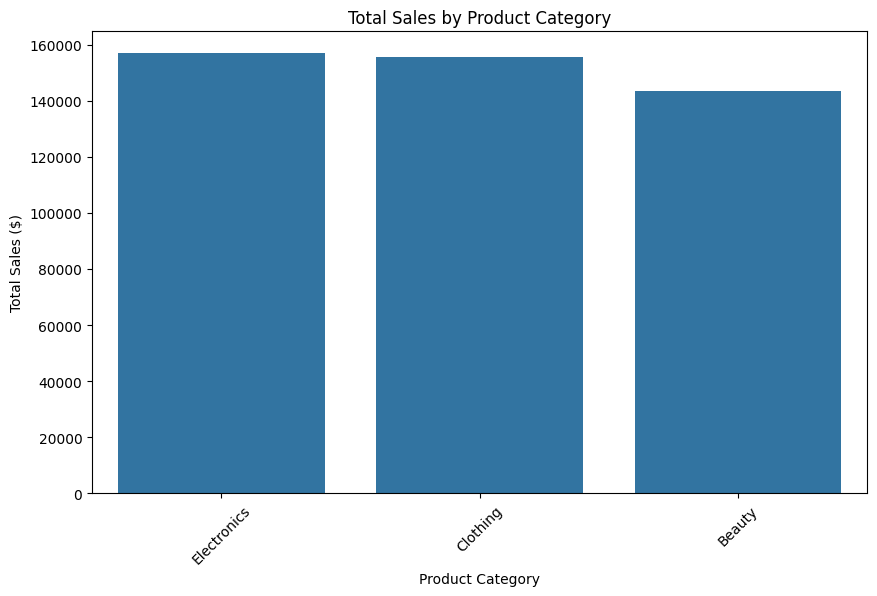

In [9]:
# Total Sales by Product Category
category_sales = data.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)

# Plot total sales by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

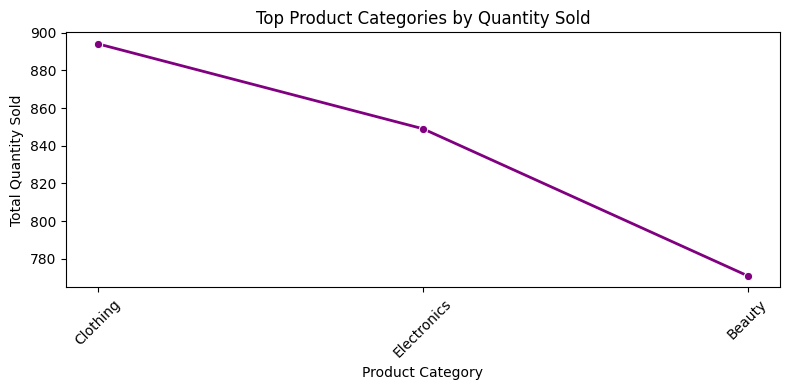

In [10]:
# Top Product Categories by Quantity Sold
top_products = data.groupby("Product Category")["Quantity"].sum().sort_values(ascending=False)

# Plot top product categories by quantity (line plot)
plt.figure(figsize=(8, 4))
sns.lineplot(x=top_products.index, y=top_products.values, marker="o", color="purple", linewidth=2)
plt.title("Top Product Categories by Quantity Sold")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
data["Gender"].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

<class 'pandas.core.series.Series'>


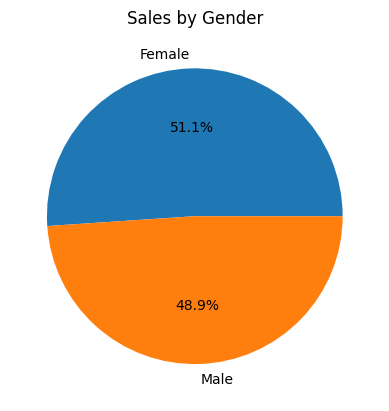

In [12]:
sales_by_gender = data.groupby('Gender')['Total Amount'].sum()

# Make sure 'sales_by_gender' is a pandas Series
print(type(sales_by_gender))  # This should output: <class 'pandas.core.series.Series'>

# Now plot the pie chart directly from the Series
sales_by_gender.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Gender')
plt.ylabel('')  # This hides the y-axis label, which is not needed for pie charts
plt.show()

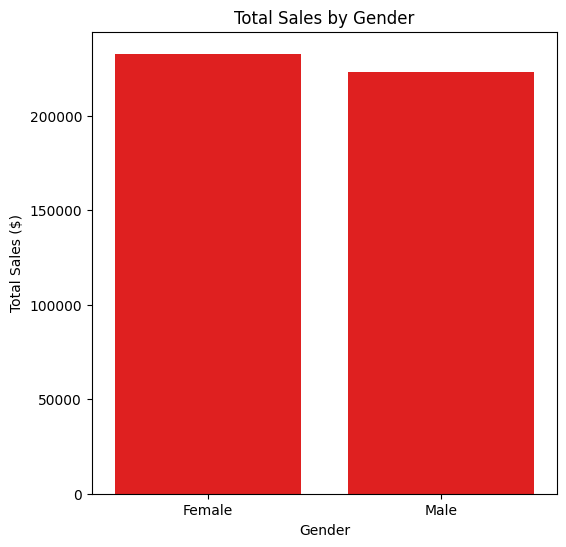

In [13]:
# Total Sales by Gender
gender_sales = data.groupby("Gender")["Total Amount"].sum()

# Plot total sales by Gender
plt.figure(figsize=(6, 6))
sns.barplot(x=gender_sales.index, y=gender_sales.values,color='red')
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales ($)")
plt.show()